In [97]:
import numpy as np
import pandas as pd
from sklearn import datasets
from io import StringIO
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
# it creates the graph within the notebook
%matplotlib inline 
import os
os.listdir() # returns list of all files and directories in the specified directory

['.ipynb_checkpoints',
 '0000000025600648_notebook_LogisticRegression-TitanicDataset.ipynb',
 '0000000025600648_Predictions_titanic.csv',
 '0001.jpg',
 '2222.png',
 'abc.html',
 'Anji -Jupyter Notebooks ADVANCED COURSE',
 'anji pics.JPG',
 'API 2 ALL.mp4',
 'API 2.mp4',
 'api correct.mp4',
 'api key details.docx',
 'API.pdf',
 'API2 LEC.pdf',
 'BeautifulSoup.html',
 'Capture.JPG',
 'CAR PERFUME SS.docx',
 'Careerlabs',
 'Chaitanya Insta Bot 2.ipynb',
 'CHAPTER 15 SOURCE IMAGES',
 'CHAPTER 15 SOURCE IMAGES.rar',
 'CHAPTER-15 PICS',
 'CHAPTER-15.docx',
 'Code Gradient Descent',
 'complexity analysis of normal eqn.mp4',
 'Complexity Analysis of Normal Equation LR',
 'correct sqlite.mp4',
 'debug.log',
 'Decision Trees - II',
 'DECISION TREES TITANIC DATASET.ipynb',
 'DESCRIPTIVE STATISTICS.mp4',
 'desktop.ini',
 'Feature Scaling',
 'feature_scaling_wine_data.csv',
 'FINAL BOOK CHAPTERS',
 'Galaxy Icon.jpg',
 'gd new.ipynb',
 'GIT HUB AUTHENTICATION.pdf',
 'GRADIENT DESCENT PROJECT-2 (COMB

Comments

In [98]:
# sklearn module only takes numerical inputs 

## For Training Data

In [99]:
train = pd.read_csv('Titanic_Dataset_train.csv')
test = pd.read_csv('Titanic_Dataset_test.csv')

In [100]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [101]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [102]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,223.000000,178.000000,223.000000,223.000000,223.000000
mean,2.345291,29.694775,0.506726,0.304933,32.622551
std,0.850047,15.398053,1.169700,0.634108,61.062047
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,19.250000,0.000000,0.000000,7.879200
50%,3.000000,27.000000,0.000000,0.000000,12.475000
75%,3.000000,37.750000,1.000000,0.000000,30.035400
max,3.000000,71.000000,8.000000,2.000000,512.329200


In [103]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


Comments

In [104]:
# here the first column is the target variable 

In [105]:
train.shape

(668, 11)

In [106]:
test.shape

(223, 10)

In [107]:
train.isna().sum()
#checking NaN values in each column of train dataset.

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

###### difference b/w labels and features : 
Features are the fields used as input and labels are used as output. As a simple example, consider how to predict whether one should sell a car based on car mileage, year, etc. Yes/no is the label whereas the mileage and year would be the features

In [108]:
train['Embarked'].value_counts()

S    484
C    133
Q     50
Name: Embarked, dtype: int64

In [ ]:
# onehotencoding, lableencoder
# Embarked, Sex = labelencoder.
## drop Name,Ticket, Cabin
## mean = age.

#### LabelEncoder

In [109]:
label_encoder = preprocessing.LabelEncoder()

In [110]:
# DataFrame.astype() method is used to cast a pandas object to a specified dtype
train['Embarked'] = train['Embarked'].astype(str)
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
train['Embarked'].unique()

array([2, 0, 1, 3])

In [111]:
train['Sex'] = label_encoder.fit_transform(train['Sex'])

In [112]:
meanage = train['Age'].mean()

In [113]:
meanage = int(meanage)

In [114]:
meanage

29

In [115]:
train['Age'] = train['Age'].fillna(meanage)

In [116]:
train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",0,29.0,1,0,228414,26.0000,NaN,2,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",1,29.0,0,0,A/5 2466,8.0500,NaN,2,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,39.0,0,0,250655,26.0000,NaN,2,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,2,0
4,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",0,17.0,0,0,SO/C 14885,10.5000,NaN,2,1
664,3,"Morrow, Mr. Thomas Rowan",1,29.0,0,0,372622,7.7500,NaN,1,0
665,3,"Bing, Mr. Lee",1,32.0,0,0,1601,56.4958,NaN,2,1
666,3,"Strandberg, Miss. Ida Sofia",0,22.0,0,0,7553,9.8375,NaN,2,0


In [117]:
train = train.drop(['Name','Ticket','Cabin'], axis = 1)

In [118]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,29.0,1,0,26.0000,2,1
1,3,1,29.0,0,0,8.0500,2,0
2,2,1,39.0,0,0,26.0000,2,0
3,3,0,29.0,0,4,21.0750,2,0
4,3,1,25.0,0,0,7.0500,2,0
...,...,...,...,...,...,...,...,...
663,2,0,17.0,0,0,10.5000,2,1
664,3,1,29.0,0,0,7.7500,1,0
665,3,1,32.0,0,0,56.4958,2,1
666,3,0,22.0,0,0,9.8375,2,0


In [119]:
train.shape

(668, 8)

In [120]:
train.isnull().sum() # it removed the missing values 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Comments

In [121]:
# to build any model using sklearn we have to specifically define the target variable and all the 
# independent variables 
# Dependent variables are the output of the process
# Independent variables are the input of the process
# stratify will make similar distribution of classes in both the training data and testing data

In [122]:
y = train['Survived'] # 'Survived' is the target variable
x = train.drop(['Survived'], axis = 1) # we stored all the other variables as independent variables 

In [123]:
from sklearn.model_selection import train_test_split # using this we create a validation set

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state = 101, stratify=y, test_size = 0.25)

In [125]:
# Python provides the preprocessing library, which contains the normalize function to normalize 
# the data. It takes an array in as an input and normalizes its values between 0 and 1

In [126]:
y_train.value_counts(normalize = True) # normalize returns the %age
#here 0 : 59% are 0 

#here 1 : 40% are 1 

0    0.596806
1    0.403194
Name: Survived, dtype: float64

In [127]:
y_test.value_counts(normalize = True)

0    0.598802
1    0.401198
Name: Survived, dtype: float64

In [128]:
x_train.shape,y_train.shape

((501, 7), (501,))

In [129]:
x_test.shape,y_test.shape

((167, 7), (167,))

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#this is a classification problem where we have to predict whether the passengers on the titanic will 
#survive or will not survive.

In [131]:
from sklearn.tree import DecisionTreeRegressor # it is used in case of regression problems  

In [132]:
dt_model = DecisionTreeClassifier(random_state = 10) # we create the decision tree model 
# in random_state we can choose any integer value 

In [133]:
dt_model.fit(x_train,y_train)
#default criteria of spliting is gini and we can change it to chi-square as well

DecisionTreeClassifier(random_state=10)

In [134]:
dt_model.score(x_train,y_train) # training accuracy is very high

0.9800399201596807

In [135]:
dt_model.score(x_test,y_test) # but testing accuracy is not that high

0.7844311377245509

In [136]:
dt_model.predict(x_test) # we make prediction for all the testing data points 

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [137]:
dt_model.predict_proba(x_test) # 1st column is for class 0 and 2nd column is for class 1

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [138]:
# we can also use different thresholds to decide the class observation 
# when we use the predict function it takes 0.5 as the default threshold 

In [139]:
y_pred = dt_model.predict_proba(x_test)[:,1] # we take the 1st column predicting the probabilities of
                                             # 1 and we save it in a variable

In [140]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.6: # the default thershold was 0.5 but we take 0.6 as the threshold
        new_y.append(0) #any prob < 0.6 will be taken as 0
    else:
        new_y.append(1) #any prob > 0.6 will be taken as 1

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y_test,new_y) 
# it is not necessary that after changing the threshold the accuracy will increase, it might decrease 
# as well

#max-depth : it tells us the longest path of the tree

0.7844311377245509

### Changing Max Depth

In [143]:
# we will train the decision tree model 10 times and change the parameter max depth from 1 to 10
#for each model we are storing the training accuracy and testing accuracy

train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

In [144]:
# now we will create a dataframe from the values which we got from the previous cell
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.772455,0.784431
1,2,0.778443,0.772455
2,3,0.810379,0.802395
3,4,0.812375,0.778443
4,5,0.848303,0.814371


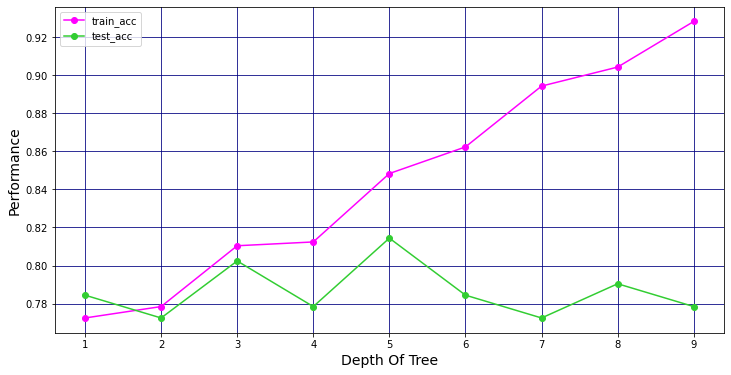

In [145]:
plt.figure(figsize = (12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o', color = 'magenta', label = 'train_acc')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o', color = 'limegreen', label = 'test_acc')
plt.xlabel('Depth Of Tree', fontsize = 14)
plt.ylabel('Performance', fontsize = 14)
plt.grid(color = 'navy')
plt.legend()

# lower value of max_depth did not allowed the model to learn the pattern and we got low performace which is underfitting
# as max_depth is increasing both the training and testing accuracy is increasing 
# 5 is the max_depth where testing accuracy is the highest 

In [146]:
# 1. max_leaf_nodes : Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction 
#                     in impurity. If None then unlimited number of leaf nodes.

# 2. min_samples_split: int or float, default=2. The minimum number of samples required to split an internal node

# 3. min_samples_leaf: int or float, default=1. The minimum number of samples required to be at a leaf node.     

In [147]:
# We found the optimum value for an individual parameter, we can try it with a combination of paramters 

In [148]:
## using combination of max_depth and max_leaf nodes

dt_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 10)

In [149]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [150]:
dt_model.score(x_train,y_train)

0.8862275449101796

In [151]:
dt_model.score(x_test,y_test) # the testing accuracy improved and both the training and testing 
                              # accuracy are in sync
                              # the model we have created is a more generalized model

0.8023952095808383

In [152]:
# grid search helps us to find the optimum value for a combination of parameters

In [153]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
import pydotplus

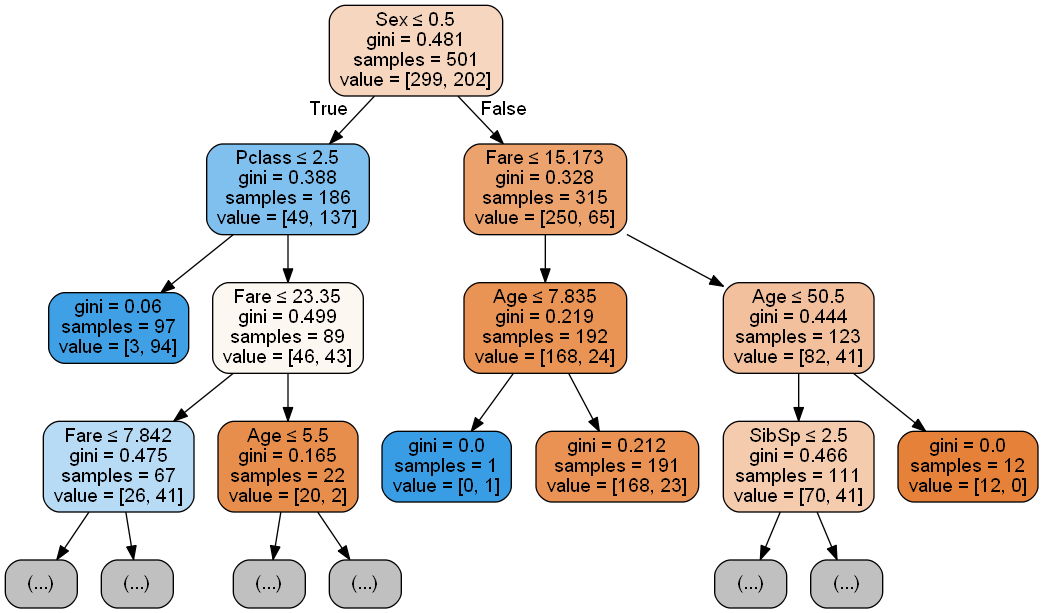

In [156]:
# the max_depth here means that the decision tree will be printed till max_depth = 2, but the dt_model 
# is trained till the depth that we specified while training the model
dot_data = StringIO()
export_graphviz(dt_model, out_file = dot_data, max_depth = 3, feature_names = x_train.columns, special_characters = True, rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Applications of Decision Tree:


* Fraud detection
* Credit risk
* Loan default : Default is the failure to repay a debt, including interest or principal, on a loan                   or security. 
* Predicting sales of a retail outlet (or any other business!)
* Number of bikes rented
* Employee attrition : Employee attrition is defined as the natural process by which employees leave                         the workforce
* Customer churn : Customer churn is the percentage of customers that stopped using your company's                       product or service during a certain time frame

#### Note

If we grow a tree more than we should, we are likely to end up having an overfit model. Overfitting occurs when a tree fits the training set too well. Having very different accuracies on training and test sets is a strong indication of overfitting. In such cases, we should control the tree growth to obtain a well-generalized model.